In [1]:
# making some python3 changes...

In [9]:
import PyMca5 as mca
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'png'

specdir = '/users/opid01/edo/inhouse_jan_17/spec/'

In [35]:
files = !ls {specdir} | grep spec | grep fast
for fname in files: print(fname)
rois = ['mpx4int', 'roi7', 'roi8', 'roi6']
sample_name = 'e16014'

align_fast_00006.spec
align_fast_00009.spec
samples_fast_00007.spec
samples_fast_00009.spec
samples_fast_00010.spec
samples_fast_00011.spec
samples_fast_00013.spec
samples_fast_00014.spec
samples_fast_00015.spec
samples_fast_00016.spec
samples_fast_00017.spec
samples_fast_00018.spec
samples_fast_00019.spec
samples_fast_00020.spec
samples_fast_00021.spec
samples_fast_00022.spec
samples_fast_00023.spec
samples_fast_00024.spec
samples_fast_00025.spec
samples_fast_00026.spec
samples_fast_00027.spec
samples_fast_00028.spec
samples_fast_00029.spec
samples_fast_00030.spec
samples_fast_00031.spec
samples_fast_00032.spec
samples_fast_00033.spec
samples_fast_00034.spec
samples_fast_00035.spec
samples_fast_00036.spec
samples_fast_00037.spec
samples_fast_00041.spec


41 was stopped so not good. large stability kmaps are 15[1] to 37. the rest is positioning stuff. 15[1] is at 00:44 and 37 is at 08:31!

In [27]:
sf = mca.specfile.Specfile(specdir+files[7])
print('n of scans is {0}'.format(int(sf.list()[2:])))

ValueError: invalid literal for int() with base 10: ''

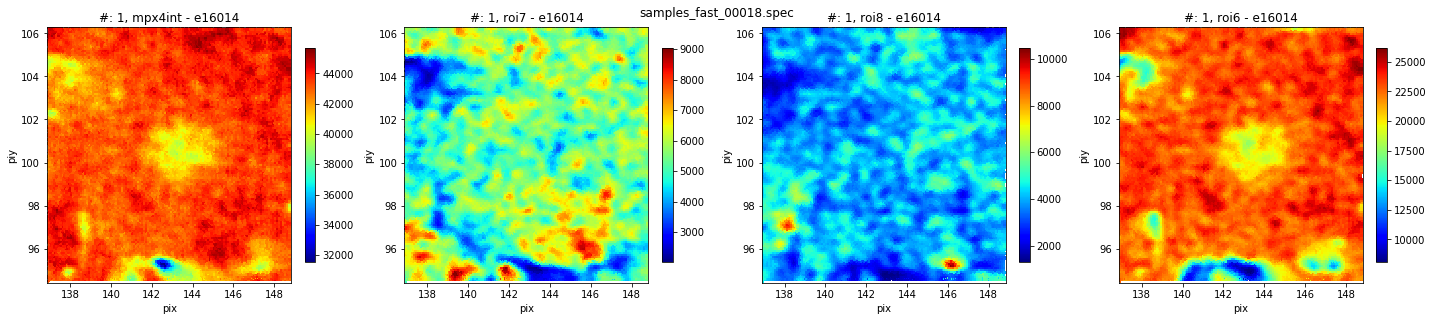

In [46]:
@interact(fnum=(7,30))
def plt_kmaps(fnum=9):
    # get the scan
    scan = mca.specfile.Specfile(specdir+files[fnum])[0]
    # get the data and the rois
    data = scan.data()
    index_list = scan.alllabels()

    # plotting
    fig = plt.figure(figsize=(20,4.5))
    tot_fig = len(rois)

    for index, what2plot in enumerate(rois): # rois tbd beforehand

        plt.subplot(1, tot_fig, index+1)
        # load data
        rawdata = data[index_list.index(what2plot)]
        motor_1 = data[index_list.index('adcX')]
        motor_2 = data[index_list.index('adcY')]
        new_shape = (int(scan.command().split()[8]), int(scan.command().split()[4]))
        # apply dimensions
        rawdata.shape, motor_1.shape, motor_2.shape = new_shape, new_shape, new_shape
        # plot it
        plt.pcolormesh(motor_1, motor_2, rawdata, cmap='jet')
        plt.axis([motor_1.min(),motor_1.max(),motor_2.min(),motor_2.max()])
        plt.ylabel('piy')
        plt.xlabel('pix')
        plt.colorbar(fraction=0.04)
        plt.title('#: {0}, {1} - '.format(scan_no, what2plot)+sample_name)
        plt.suptitle(files[fnum])
#         plt.axes().set_aspect('equal') #can't use it, looks difficult to fix... figsize for now.
    fig.tight_layout()
    plt.savefig('../img/'+files[fnum][:-5]+'.png')